<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/NN_PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('stock_data.csv')
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


*  Stock_1 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_2 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_3 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_4 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_5 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the

In [56]:
df = df.rename(columns={'Unnamed: 0': 'Date'})

In [57]:
df.shape

(365, 6)

In [58]:
print(df.isnull().sum(),'\n')
print(df.info(),'\n')
print(df.describe())

Date       0
Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
Stock_5    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Stock_1  365 non-null    float64
 2   Stock_2  365 non-null    float64
 3   Stock_3  365 non-null    float64
 4   Stock_4  365 non-null    float64
 5   Stock_5  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB
None 

          Stock_1     Stock_2     Stock_3     Stock_4     Stock_5
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean   107.772577   81.105216   94.519502  117.407560  106.866865
std      7.398296   11.435212    6.519213    6.778527    3.760968
min     91.474442   62.414219   81.111434   99.909756   99.833309
25%    101.603117   69.328263   89.788068  112.209912  103.927072
50%    107.421299   84.283525   94.495546  

In [59]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

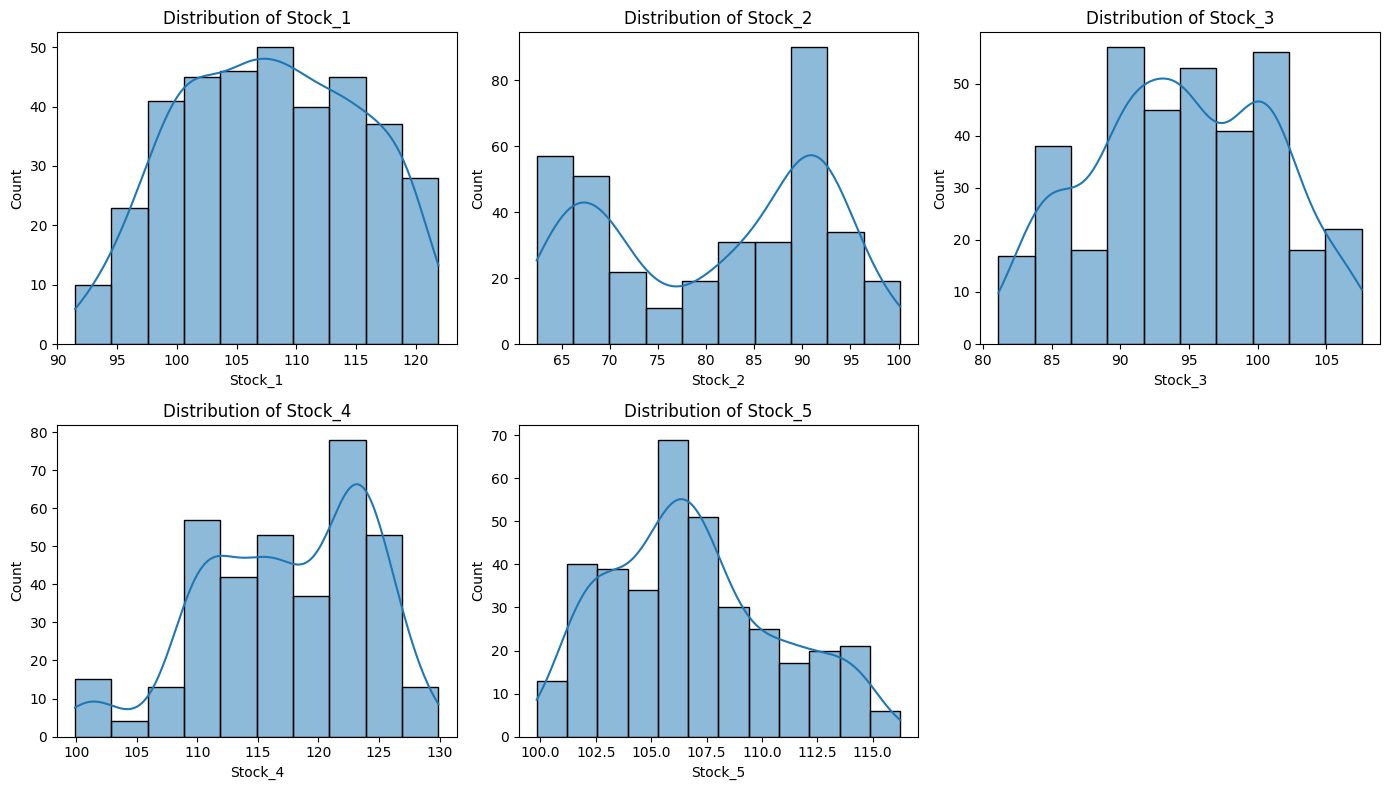

In [60]:
plt.figure(figsize=(14, 8))
columns = ['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

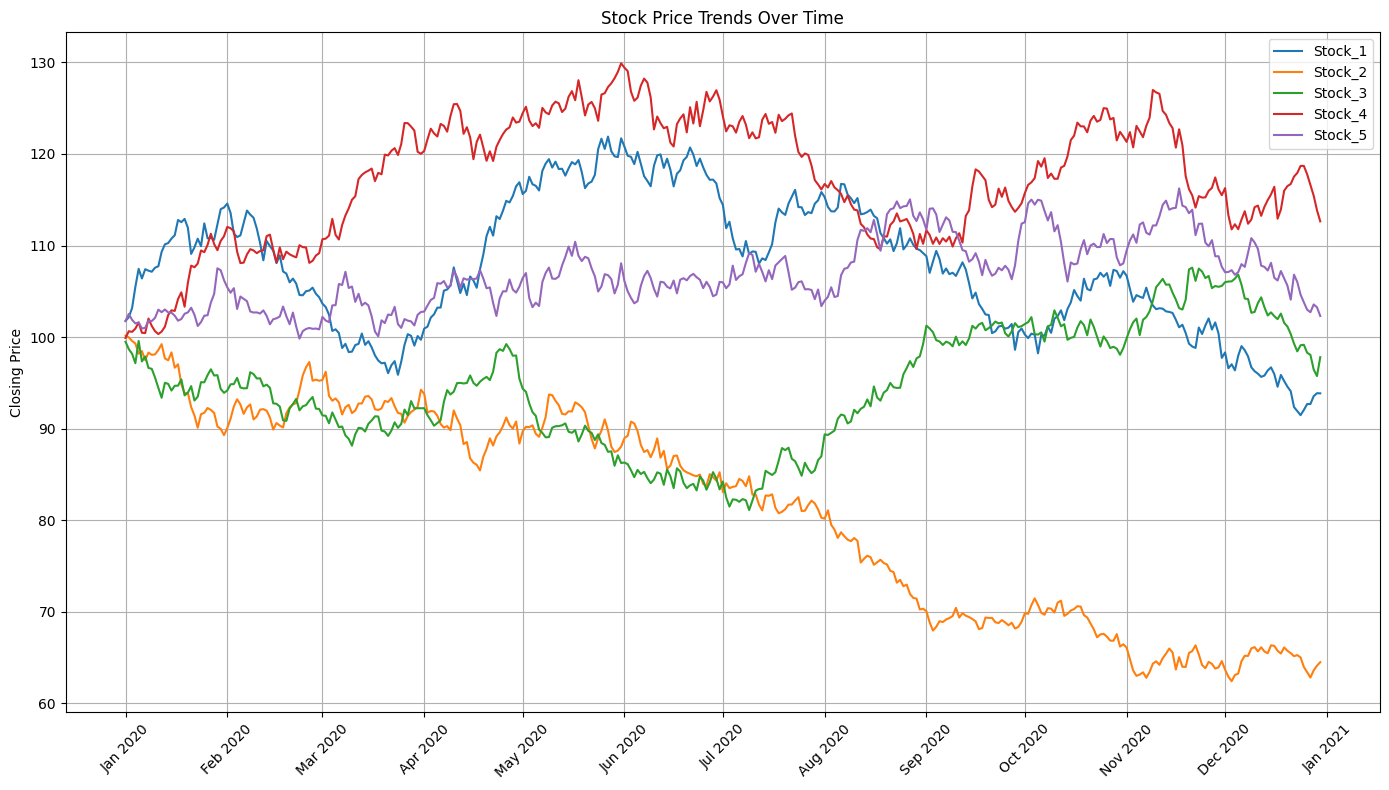

In [61]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 8))
for column in df.columns[1:]:  # Skip the 'Date' column
    plt.plot(df['Date'], df[column], label=column)  # Use the Date column directly

plt.title('Stock Price Trends Over Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks at the beginning of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2023'

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

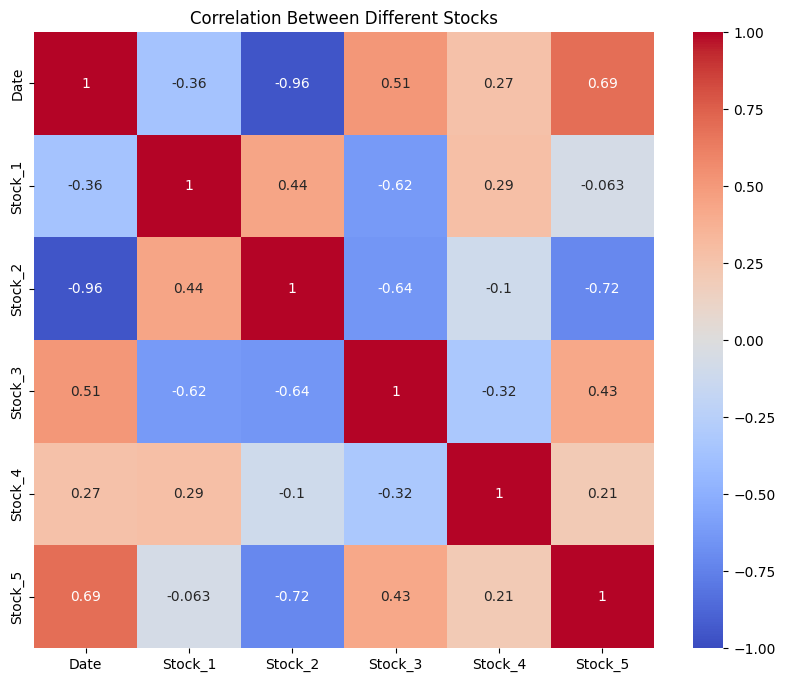

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Different Stocks')
plt.show()

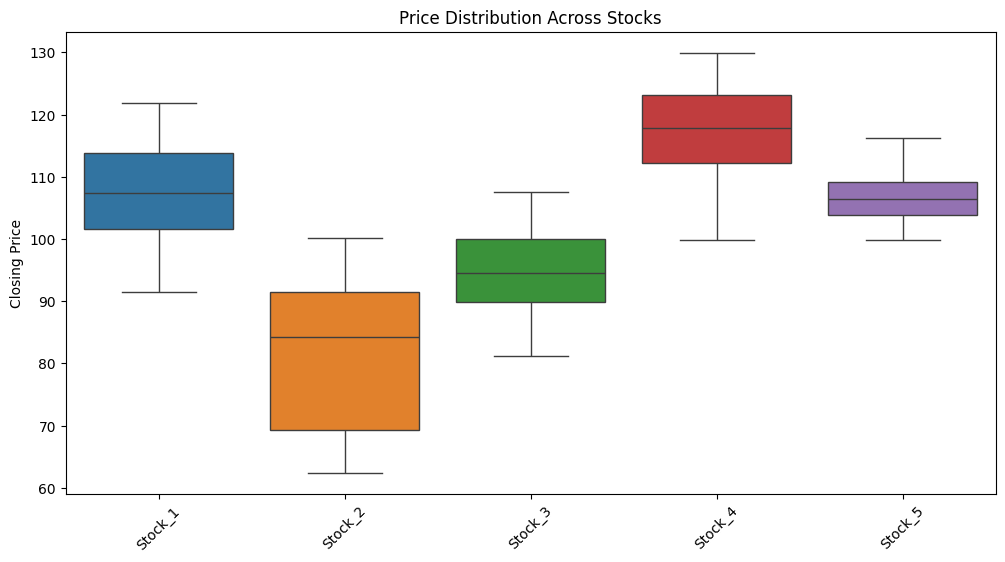

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Price Distribution Across Stocks')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

Making data more stationary

In [64]:
for col in ['Stock_1','Stock_2','Stock_3','Stock_4','Stock_5']:
    df[f'{col}_log_return'] = np.log(df[col] / df[col].shift(1))

rolling statistics

In [65]:
for col in ['Stock_1','Stock_2','Stock_3','Stock_4','Stock_5']:
    df[f'{col}_roll_mean_5'] = df[col].rolling(5).mean()
    df[f'{col}_roll_std_5'] = df[col].rolling(5).std()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   Stock_1              365 non-null    float64       
 2   Stock_2              365 non-null    float64       
 3   Stock_3              365 non-null    float64       
 4   Stock_4              365 non-null    float64       
 5   Stock_5              365 non-null    float64       
 6   Stock_1_log_return   364 non-null    float64       
 7   Stock_2_log_return   364 non-null    float64       
 8   Stock_3_log_return   364 non-null    float64       
 9   Stock_4_log_return   364 non-null    float64       
 10  Stock_5_log_return   364 non-null    float64       
 11  Stock_1_roll_mean_5  361 non-null    float64       
 12  Stock_1_roll_std_5   361 non-null    float64       
 13  Stock_2_roll_mean_5  361 non-null  

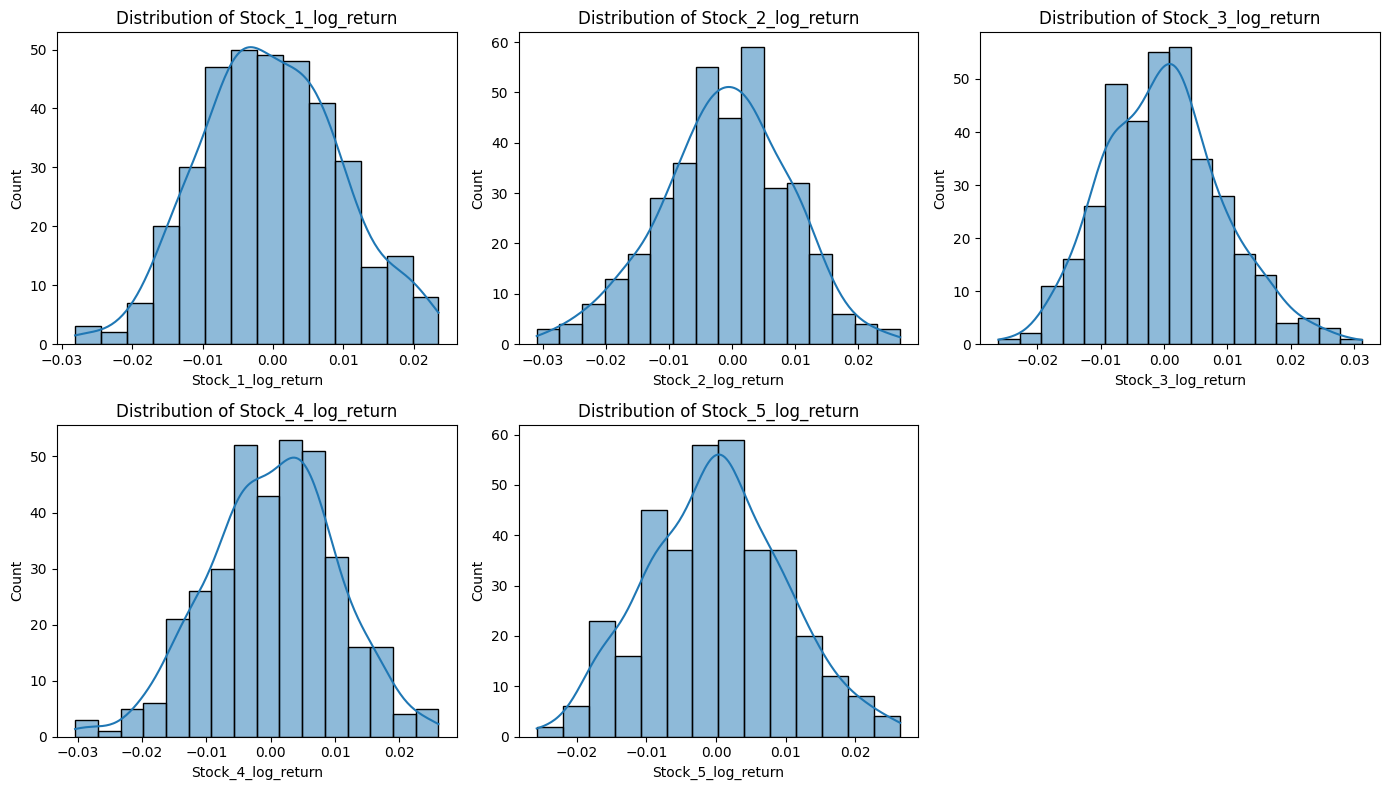

In [67]:
plt.figure(figsize=(14, 8))
columns = ['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_cols =['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return']
df[stock_cols] = scaler.fit_transform(df[stock_cols])


In [69]:
# Lag features (previous prices)
lags = [1, 2, 3]
for col in stock_cols:
    for lag in lags:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

In [70]:
df = df.dropna().reset_index(drop=True)

preparing the data

In [71]:
print(df.columns.tolist())

['Date', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5', 'Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return', 'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5', 'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5', 'Stock_5_roll_mean_5', 'Stock_5_roll_std_5', 'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3', 'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3', 'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3', 'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3', 'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3']


In [72]:
feature_cols = ['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return',
    # rolling means & std (5-day)
    'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5',
    'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5',
    'Stock_5_roll_mean_5', 'Stock_5_roll_std_5',
    # lagged features (lags 1,2,3)
    'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3',
    'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3',
    'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3',
    'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3',
    'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3'
]

In [73]:
feature_cols = [col for col in feature_cols if col in df.columns]


In [74]:
print(feature_cols)

['Stock_1_log_return', 'Stock_2_log_return', 'Stock_3_log_return', 'Stock_4_log_return', 'Stock_5_log_return', 'Stock_1_roll_mean_5', 'Stock_1_roll_std_5', 'Stock_2_roll_mean_5', 'Stock_2_roll_std_5', 'Stock_3_roll_mean_5', 'Stock_3_roll_std_5', 'Stock_4_roll_mean_5', 'Stock_4_roll_std_5', 'Stock_5_roll_mean_5', 'Stock_5_roll_std_5', 'Stock_1_log_return_lag_1', 'Stock_1_log_return_lag_2', 'Stock_1_log_return_lag_3', 'Stock_2_log_return_lag_1', 'Stock_2_log_return_lag_2', 'Stock_2_log_return_lag_3', 'Stock_3_log_return_lag_1', 'Stock_3_log_return_lag_2', 'Stock_3_log_return_lag_3', 'Stock_4_log_return_lag_1', 'Stock_4_log_return_lag_2', 'Stock_4_log_return_lag_3', 'Stock_5_log_return_lag_1', 'Stock_5_log_return_lag_2', 'Stock_5_log_return_lag_3']


In [75]:
df = df.dropna(subset=feature_cols).reset_index(drop=True)

model building

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [85]:
# Define target and features
target_col = 'Stock_1_log_return_target'
feature_cols = [col for col in df.columns if col not in ['Date', 'Stock_1_log_return', target_col]]

In [86]:
# Prepare data
X = df[feature_cols].values
y = df[target_col].values

In [87]:
# Train-test split (time-series aware)
test_size = 0.2
split_idx = int(len(X) * (1 - test_size))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [88]:
# Feature scaling (already done for log returns, scale the rest)
other_features = [col for col in feature_cols if col not in stock_cols]
if other_features:
    other_scaler = StandardScaler()
    X_train[:, len(stock_cols):] = other_scaler.fit_transform(X_train[:, len(stock_cols):])
    X_test[:, len(stock_cols):] = other_scaler.transform(X_test[:, len(stock_cols):])

In [89]:
# Build ANN model with regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Linear activation for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# Custom optimizer with learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

In [92]:
# Training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 2.6604 - mae: 1.1043 - val_loss: 2.7720 - val_mae: 1.0921 - learning_rate: 8.0000e-06
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.6616 - mae: 1.0244 - val_loss: 2.6121 - val_mae: 1.0360 - learning_rate: 8.0000e-06
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.6014 - mae: 1.0049 - val_loss: 2.4705 - val_mae: 0.9838 - learning_rate: 8.0000e-06
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.8159 - mae: 1.0761 - val_loss: 2.3465 - val_mae: 0.9383 - learning_rate: 8.0000e-06
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.8323 - mae: 1.1106 - val_loss: 2.2303 - val_mae: 0.9017 - learning_rate: 8.0000e-06
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5888 - mae: 1.0401 - val_loss: 2.1875 - val_mae: 0.8866 - learning_rate: 8.0000e-06
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5536 - mae: 1.0113 - val_loss: 2.2091 - val_mae: 0.8911 - learning_rate: 8.0000e-0

In [93]:
# Evaluation
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTrain Loss: {train_loss[0]:.4f}, Test Loss: {test_loss[0]:.4f}")


Train Loss: 2.8230, Test Loss: 2.3657
